In this notebook:

Fig. 4A Heatmaps by category

Fig. 4B ranking

Fig. 4C, D windowed examples

In [1]:
# %load /Users/hwayment/ipynb_defaults.py
%load_ext autoreload
%autoreload 2

%pylab inline
import numpy as np
import pandas as pd

import seaborn as sns
sns.set_style('ticks')
sns.set_context('paper')
import os
from arnie.mfe import mfe
from arnie.pfunc import pfunc
from arnie.bpps import bpps
#from ipynb.draw import draw_struct
from RiboGraphViz import RGV

import eternabench as eb

Populating the interactive namespace from numpy and matplotlib


In [4]:
zscores = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EternaBench_external_zscores_by_dataset_MANUAL_COMPILED.csv')
#ranking = pd.read_csv(os.environ['ETERNABENCH_PATH']+'/scoring_data/EternaBench_external_ranking.csv')
package_order=['rnastructure','vienna_2','vienna_2_60C','rnastructure_60C', 'rnasoft_blstar', 'contrafold_2','eternafold_B']

types = ['viral_gRNA','SARS-CoV-2_gRNA','mRNA','rRNA','synthetic RNA']

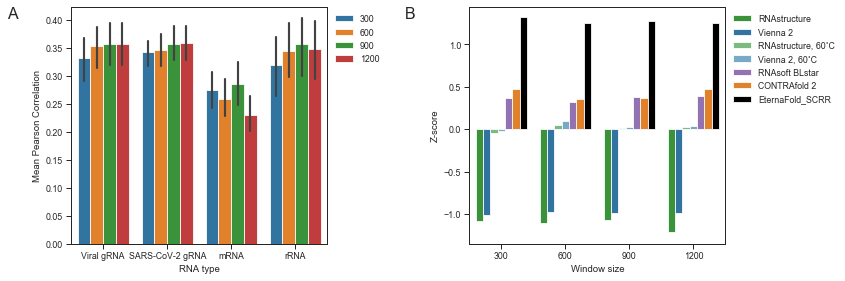

In [110]:
figure(figsize=(12,4))
subplot(1,2,1)
sns.barplot(x='Class',y='pearson_mean', data=zscores.loc[zscores.Class!='small RNAs'],hue='window_size')
legend(frameon=False, bbox_to_anchor=(1,1))
ylabel('Mean Pearson Correlation')
xlabel('RNA type')
xticks(range(4), ['Viral gRNA','SARS-CoV-2 gRNA','mRNA','rRNA'])
annotate('A', xy=(-.25, 1.), xycoords='axes fraction', horizontalalignment='left', verticalalignment='top', fontsize=16)

blue, orange, green, red, purple, brown, _, _, _, _=sns.color_palette()
light_Green = sns.color_palette('Greens',3)[1]
light_blue = sns.color_palette('Blues',3)[1]
palette = [brown, blue, red, green, orange, purple, [0,0,0]]

subplot(1,2,2)

palette=[green, blue, light_Green, light_blue, purple, orange, [0,0,0]]
sns.barplot(x='window_size',y='pearson_zscore_by_Dataset_mean', data=zscores.loc[zscores.Class!='small RNAs'],hue='title',hue_order=title_order, palette=palette,ci=False)
legend(bbox_to_anchor=(1,1),frameon=False)
annotate('B', xy=(-.25, 1.), xycoords='axes fraction', horizontalalignment='left', verticalalignment='top', fontsize=16)
ylabel('Z-score')
xlabel('Window size')

tight_layout()

savefig('FIGURES/SI/all_windows_analysis.pdf',bbox_inches='tight')
savefig('FIGURES/SI/all_windows_analysis.png',dpi=300, bbox_inches='tight')

In [6]:
ds_to_remove = ['Rice,2014 SHAPE(1M6)','Simon,2019 Ecoli invitro',
       'Rice,2014 SHAPE(1M7)', 'Rice,2014 SHAPE(NMIA)']

zscores = zscores.loc[~zscores.Dataset.isin(ds_to_remove)]
zscores = zscores.loc[zscores.window_size==900]

In [16]:
zscores.groupby(['Class','package'])['pearson_zscore_by_Dataset_mean'].mean()

Class            package         
SARS-CoV-2_gRNA  contrafold_2        0.376274
                 eternafold_B        1.660907
                 rnasoft_blstar      0.541391
                 rnastructure       -1.066317
                 rnastructure_60C   -0.255158
                 vienna_2           -1.010323
                 vienna_2_60C       -0.246773
mRNA             contrafold_2       -0.017561
                 eternafold_B        1.273168
                 rnasoft_blstar      0.244681
                 rnastructure       -1.161934
                 rnastructure_60C    0.316993
                 vienna_2           -1.020964
                 vienna_2_60C        0.365617
rRNA             contrafold_2        0.792319
                 eternafold_B        0.845613
                 rnasoft_blstar      0.368054
                 rnastructure       -0.937011
                 rnastructure_60C   -0.217469
                 vienna_2           -0.784364
                 vienna_2_60C       -0.067141


In [17]:
for i, rna in enumerate(types):
    tmp_zscores = zscores.loc[zscores.window_size==900][zscores.Class==rna]
    #tmp_ranking = ranking.loc[ranking.window_size==900][ranking.Class==rna]
    n=len(tmp_zscores.Dataset.unique())
    
    eb.plot.ranked_heatmap_w_bar_overhead(tmp_zscores, tmp_ranking, package_order=package_order, vmin=-1.7,vmax=1.7,figsize=(.3*n+2,4), width_ratios=[.3*n, 2], ext=True)
    savefig('FIGURES/4/%s_heatmap.pdf' % rna,bbox_inches='tight')

NameError: name 'tmp_ranking' is not defined

<Figure size 432x288 with 0 Axes>

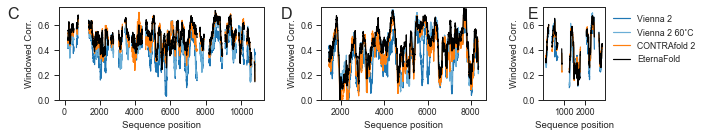

In [18]:
ex_data=['Huber (2019), ZILM','Sun, 2019 HEK293 chromatin in vitro ENST00000534336',
         'Deigan, 2009 ex vivo deproteinized e. Coli 23S rRNA' ]

blue, orange, green, red, purple, brown, _, _, _, _=sns.color_palette()
palette = [brown, blue, red, green,orange, purple, [0,0,0]]

titles=['Vienna 2', 'Vienna 2 60˚C', 'CONTRAfold 2','EternaFold']

packages = ['vienna_2', 'vienna_2_60C','contrafold_2', 'eternafold_B']
light_blue=sns.color_palette('Blues',3)[1]

colors=[blue, light_blue, orange,'k']

figure(figsize=(6,4))

gridkw = dict(width_ratios=[10,8,3])
fig, ax = plt.subplots(1,3, gridspec_kw=gridkw, figsize=(10,2))

letters=list('CDE')

for ex_ind, ex in enumerate(ex_data):
    for p, pkg in enumerate(packages):
        df = pd.read_json(os.environ['ETERNABENCH_PATH']+'/data/Ext900/CM_%s.json.zip' % pkg)
        tmp = df.loc[df.name==ex]
        n=tmp['orig_seqpos'].iloc[-1][-1]+1
        cat_r = {k:[] for k in range(n)}
        cat_p = {k:[] for k in range(n)}
        for _, row in tmp.iterrows():
            for i, orig in enumerate(row['orig_seqpos']):
                cat_p[orig].append(row['p_%s' % pkg][i])
                cat_r[orig].append(row['reactivity'][i])

        cat_R = [cat_r[i][0] for i in range(n)]
        cat_P = [np.nanmedian(cat_p[i]) for i in range(n)]

        dat = pd.DataFrame({'R': cat_R, 'P': cat_P})
        ax[ex_ind].plot(dat['R'].rolling(150).corr(dat['P']),c=colors[p],label=titles[p])
    ax[ex_ind].set_ylabel('Windowed Corr.')
    ax[ex_ind].set_ylim([0,0.75])
    ax[ex_ind].annotate(letters[ex_ind], xy=(-.25, 1.), xycoords='axes fraction', horizontalalignment='left', verticalalignment='top', fontsize=16)

    ax[ex_ind].set_xlabel('Sequence position')
    if ex_ind==2:
        legend(bbox_to_anchor=(1,1),frameon=False)
    
tight_layout()
savefig('FIGURES/4/4CDE.pdf',bbox_inches='tight')